In [114]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import re
import numpy as np
import networkx as nx
import seaborn as sns
from wordcloud import WordCloud

In [2]:
folder_path = '/Users/nemoby/Desktop/FA24-Data/final-project'
file_list = glob.glob(folder_path + '/*.xls')

In [3]:
#merge files and store as dataframe
merged_df = pd.DataFrame()

for file in file_list:
    df = pd.read_excel(file)
    merged_df = pd.concat([merged_df, df], ignore_index= True)

In [4]:
merged_df.head(5)

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Mäntymäki, M; Salo, J",NaN,NaN,NaN,"Mantymaki, Matti; Salo, Jari",NaN,NaN,Teenagers in social virtual worlds: Continuous...,COMPUTERS IN HUMAN BEHAVIOR,...,Social Science Citation Index (SSCI),Psychology,831ZL,NaN,NaN,NaN,NaN,2024-10-17,WOS:000295769500003,0
1,J,"Goh, LYQ; Phillips, JG; Blaszczynski, A",NaN,NaN,NaN,"Goh, Lynette Y. Q.; Phillips, James G.; Blaszc...",NaN,NaN,Computer-mediated communication and risk-takin...,COMPUTERS IN HUMAN BEHAVIOR,...,Social Science Citation Index (SSCI),Psychology,799XJ,NaN,NaN,NaN,NaN,2024-10-17,WOS:000293319500037,0
2,J,"Lewandowski, J; Rosenberg, BD; Parks, MJ; Sieg...",NaN,NaN,NaN,"Lewandowski, Joshua; Rosenberg, Benjamin D.; P...",NaN,NaN,The effect of informal social support: Face-to...,COMPUTERS IN HUMAN BEHAVIOR,...,Social Science Citation Index (SSCI),Psychology,799XJ,NaN,NaN,NaN,NaN,2024-10-17,WOS:000293319500039,0
3,J,"Saleem, H; Beaudry, A; Croteau, AM",NaN,NaN,NaN,"Saleem, Huma; Beaudry, Anne; Croteau, Anne-Marie",NaN,NaN,Antecedents of computer self-efficacy: A study...,COMPUTERS IN HUMAN BEHAVIOR,...,Social Science Citation Index (SSCI),Psychology,799XJ,NaN,NaN,NaN,NaN,2024-10-17,WOS:000293319500054,0
4,J,"Zhen, SJ; Xie, HL; Zhang, W; Wang, SJ; Li, DP",NaN,NaN,NaN,"Zhen, Shuangju; Xie, Hongling; Zhang, Wei; Wan...",NaN,NaN,Exposure to violent computer games and Chinese...,COMPUTERS IN HUMAN BEHAVIOR,...,Social Science Citation Index (SSCI),Psychology,799XJ,NaN,NaN,NaN,NaN,2024-10-17,WOS:000293319500026,0


In [5]:
merged_df.columns

Index(['Publication Type', 'Authors', 'Book Authors', 'Book Editors',
       'Book Group Authors', 'Author Full Names', 'Book Author Full Names',
       'Group Authors', 'Article Title', 'Source Title', 'Book Series Title',
       'Book Series Subtitle', 'Language', 'Document Type', 'Conference Title',
       'Conference Date', 'Conference Location', 'Conference Sponsor',
       'Conference Host', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses', 'Affiliations', 'Reprint Addresses', 'Email Addresses',
       'Researcher Ids', 'ORCIDs', 'Funding Orgs', 'Funding Name Preferred',
       'Funding Text', 'Cited References', 'Cited Reference Count',
       'Times Cited, WoS Core', 'Times Cited, All Databases',
       '180 Day Usage Count', 'Since 2013 Usage Count', 'Publisher',
       'Publisher City', 'Publisher Address', 'ISSN', 'eISSN', 'ISBN',
       'Journal Abbreviation', 'Journal ISO Abbreviation', 'Publication Date',
       'Publication Year', 'Volume', 'Issue', 'Pa

In [6]:
#drop NA and unnecessary columns
drop_columns = ['Book Authors', 'Book Editors',
       'Book Group Authors', 'Book Author Full Names',
       'Group Authors', 'Book Series Title',
       'Book Series Subtitle', 'Conference Title',
       'Conference Date', 'Conference Location', 'Conference Sponsor',
       'Conference Host', 'Cited References', 'ISBN', 'Part Number', 'Supplement',
       'Meeting Abstract', 'Start Page', 'End Page', 'Web of Science Record']
merged_df = merged_df.drop(columns = drop_columns)
merged_df.head()

,Publication Type,Authors,Author Full Names,Article Title,Source Title,Language,Document Type,Author Keywords,Keywords Plus,Abstract,...,WoS Categories,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID)
0,J,"Mäntymäki, M; Salo, J","Mantymaki, Matti; Salo, Jari",Teenagers in social virtual worlds: Continuous...,COMPUTERS IN HUMAN BEHAVIOR,English,Article,Virtual worlds; Social virtual worlds; Network...,PERCEIVED CRITICAL MASS; INFORMATION-SYSTEMS; ...,Social virtual worlds (SVWs) have become impor...,...,"Psychology, Multidisciplinary; Psychology, Exp...",Social Science Citation Index (SSCI),Psychology,831ZL,NaN,NaN,NaN,NaN,2024-10-17,WOS:000295769500003
1,J,"Goh, LYQ; Phillips, JG; Blaszczynski, A","Goh, Lynette Y. Q.; Phillips, James G.; Blaszc...",Computer-mediated communication and risk-takin...,COMPUTERS IN HUMAN BEHAVIOR,English,Article,Videoconference; Risk; Gambling; Internet; Col...,TRUST; SELF,In an unregulated environment Internet use is ...,...,"Psychology, Multidisciplinary; Psychology, Exp...",Social Science Citation Index (SSCI),Psychology,799XJ,NaN,NaN,NaN,NaN,2024-10-17,WOS:000293319500037
2,J,"Lewandowski, J; Rosenberg, BD; Parks, MJ; Sieg...","Lewandowski, Joshua; Rosenberg, Benjamin D.; P...",The effect of informal social support: Face-to...,COMPUTERS IN HUMAN BEHAVIOR,English,Article,Buffering hypothesis; Computer-mediated commun...,STRESSFUL LIFE EVENTS; SELF-HELP; INTERNET; HE...,Survey data were collected on a military sampl...,...,"Psychology, Multidisciplinary; Psychology, Exp...",Social Science Citation Index (SSCI),Psychology,799XJ,NaN,NaN,NaN,NaN,2024-10-17,WOS:000293319500039
3,J,"Saleem, H; Beaudry, A; Croteau, AM","Saleem, Huma; Beaudry, Anne; Croteau, Anne-Marie",Antecedents of computer self-efficacy: A study...,COMPUTERS IN HUMAN BEHAVIOR,English,Article,Computer self-efficacy; Gender; Personality tr...,TECHNOLOGY ACCEPTANCE; INFORMATION-TECHNOLOGY;...,Empirical evidence suggests that computer self...,...,"Psychology, Multidisciplinary; Psychology, Exp...",Social Science Citation Index (SSCI),Psychology,799XJ,NaN,NaN,NaN,NaN,2024-10-17,WOS:000293319500054
4,J,"Zhen, SJ; Xie, HL; Zhang, W; Wang, SJ; Li, DP","Zhen, Shuangju; Xie, Hongling; Zhang, Wei; Wan...",Exposure to violent computer games and Chinese...,COMPUTERS IN HUMAN BEHAVIOR,English,Article,Violent computer games; Physical aggression; B...,INFORMATION-PROCESSING MECHANISMS; VIDEO GAMES...,Previous research shows that playing violent c...,...,"Psychology, Multidisciplinary; Psychology, Exp...",Social Science Citation Index (SSCI),Psychology,799XJ,NaN,NaN,NaN,NaN,2024-10-17,WOS:000293319500026


In [7]:
merged_df.to_excel('complete_biblio.xlsx', index= False)

In [8]:
merged_df['Publication Year'].dtypes

dtype('int64')

In [9]:
merged_df['Publication Year'].isna().sum()

np.int64(0)

In [10]:
#two journals
yearly_pub = merged_df.groupby('Publication Year').size().reset_index(name = 'Number of Pubs')
yearly_pub.head()

,Publication Year,Number of Pubs
0,1990,29
1,1991,26
2,1992,28
3,1993,33
4,1994,133


In [11]:
yearly_pub['Number of Pubs'].describe()

count     36.000000
mean     294.138889
std      247.553648
min       26.000000
25%      119.500000
50%      195.000000
75%      471.750000
max      937.000000
Name: Number of Pubs, dtype: float64

In [12]:
fig1 = go.Figure()

fig1.add_trace(
    go.Bar(x=yearly_pub['Publication Year'], y=yearly_pub['Number of Pubs'], marker_color = '#063970', name='Number of Publications')
    )


fig1.add_trace(
    go.Scatter(x=yearly_pub['Publication Year'], y=yearly_pub['Number of Pubs'],
                         mode='lines+markers', line=dict(color='#e28743'), name='Trendline')
                         )

fig1.update_layout(
    title='Annual Publication Trends',
    xaxis_title='Year',
    yaxis_title='Number of Publications',
)


fig1.show()

In [13]:
#CHB trends
yearly_pub_chb = merged_df[merged_df['Source Title'] == 'COMPUTERS IN HUMAN BEHAVIOR'].groupby('Publication Year').size().reset_index(name = 'Number of Pubs')

fig2 = go.Figure()
fig2.add_trace(go.Bar(x=yearly_pub_chb['Publication Year'], y=yearly_pub_chb['Number of Pubs'], name='Number of Publications', marker_color='blue'))


fig2.add_trace(go.Scatter(x=yearly_pub_chb['Publication Year'], y=yearly_pub_chb['Number of Pubs'],
                         mode='lines+markers', line=dict(color='red'), name='Trendline'))

fig2.update_layout(
    title='Annual Publication Trends in COMPUTERS IN HUMAN BEHAVIOR',
    xaxis_title='Year',
    yaxis_title='Number of Publications',
)

fig2.show()

In [14]:
yearly_pub_chb['Number of Pubs'].describe()

count     36.000000
mean     223.972222
std      230.986516
min       20.000000
25%       40.750000
50%      114.000000
75%      364.500000
max      869.000000
Name: Number of Pubs, dtype: float64

In [15]:
#HCS trends
yearly_pub_hcs = merged_df[merged_df['Source Title'] == 'INTERNATIONAL JOURNAL OF HUMAN-COMPUTER STUDIES'].groupby('Publication Year').size().reset_index(name = 'Number of Pubs')

fig3 = go.Figure()
fig3.add_trace(go.Bar(x=yearly_pub_hcs['Publication Year'], y=yearly_pub_hcs['Number of Pubs'], name='Number of Publications', marker_color='green'))


fig3.add_trace(go.Scatter(x=yearly_pub_hcs['Publication Year'], y=yearly_pub_hcs['Number of Pubs'],
                         mode='lines+markers', line=dict(color='purple'), name='Trendline'))

fig3.update_layout(
    title='Annual Publication Trends in INTERNATIONAL JOURNAL OF HUMAN-COMPUTER STUDIES',
    xaxis_title='Year',
    yaxis_title='Number of Publications',
)


fig3.show()

In [16]:
yearly_pub_hcs['Number of Pubs'].describe()

count     32.000000
mean      78.937500
std       23.579567
min        9.000000
25%       68.000000
50%       76.500000
75%       86.500000
max      140.000000
Name: Number of Pubs, dtype: float64

In [17]:
fig = go.Figure()


fig.add_trace(
    go.Bar(x=yearly_pub['Publication Year'], y=yearly_pub['Number of Pubs'], 
           marker_color='#063970', name='Number of Publications - Total')
)
fig.add_trace(
    go.Scatter(x=yearly_pub['Publication Year'], y=yearly_pub['Number of Pubs'],
               mode='lines+markers', line=dict(color='#e28743'), name='Trendline - Total')
)


fig.add_trace(
    go.Bar(x=yearly_pub_chb['Publication Year'], y=yearly_pub_chb['Number of Pubs'], 
           marker_color='blue', name='Number of Publications - CHB', visible=False)
)
fig.add_trace(
    go.Scatter(x=yearly_pub_chb['Publication Year'], y=yearly_pub_chb['Number of Pubs'],
               mode='lines+markers', line=dict(color='red'), name='Trendline - CHB', visible=False)
)


fig.add_trace(
    go.Bar(x=yearly_pub_hcs['Publication Year'], y=yearly_pub_hcs['Number of Pubs'], 
           marker_color='green', name='Number of Publications - HCS', visible=False)
)
fig.add_trace(
    go.Scatter(x=yearly_pub_hcs['Publication Year'], y=yearly_pub_hcs['Number of Pubs'],
               mode='lines+markers', line=dict(color='purple'), name='Trendline - HCS', visible=False)
)


updatemenus = [
    dict(
        buttons=list([
            dict(label="Total",
                 method="update",
                 args=[{"visible": [True, True, False, False, False, False]},
                       {"title": "Annual Publication Trends - Total"}]),
            dict(label="CHB",
                 method="update",
                 args=[{"visible": [False, False, True, True, False, False]},
                       {"title": "Annual Publication Trends in COMPUTERS IN HUMAN BEHAVIOR"}]),
            dict(label="HCS",
                 method="update",
                 args=[{"visible": [False, False, False, False, True, True]},
                       {"title": "Annual Publication Trends in INTERNATIONAL JOURNAL OF HUMAN-COMPUTER STUDIES"}])
        ]),
        direction="down",
        pad={"r": 10, "t": 10},
        showactive=True,
        x=1,
        xanchor="left",
        y=1.2,
        yanchor="top"
    )
]

# 更新布局
fig.update_layout(
    title="Annual Publication Trends - Total",
    xaxis_title='Year',
    yaxis_title='Number of Publications',
    updatemenus=updatemenus
)

fig.show()

In [18]:
#top30 authors
df_authors = merged_df['Author Full Names'].str.split('; ',expand= True)
df_authors_stacked = df_authors.stack().reset_index(drop=True)
author_counts = df_authors_stacked.value_counts()
top30_authors = author_counts.head(30)
top30_authors.index
#len(author_counts)

Index(['Guitton, Matthieu J.', 'Griffiths, Mark D.', 'Kirschner, Paul A.',
       'Hamari, Juho', 'Sundar, S. Shyam', 'Drouin, Michelle', 'Jou, Min',
       'Amichai-Hamburger, Yair', 'Yen, David C.', 'Kaye, Linda K.',
       'Chittaro, Luca', 'Spence, Patric R.', 'Song, Hayeon',
       'Mayer, Richard E.', 'Valkenburg, Patti M.',
       'Ordonez de Pablos, Patricia', 'Hwang, Yujong', 'Lee, Kun Chang',
       'Opwis, Klaus', 'King, Daniel L.', 'Kraemer, Nicole C.',
       'Rau, Pei-Luen Patrick', 'Goncalves, Jorge', 'Billieux, Joel',
       'Shin, Dong-Hee', 'Oliveira, Tiago', 'Park, Namkee', 'Tsai, Chin-Chung',
       'Peter, Jochen', 'Wu, Yen-Chun Jim'],
      dtype='object')

In [19]:
fig4 = go.Figure(data=[
    go.Bar(x=top30_authors.index, y=top30_authors.values)
])

fig4.update_layout(
    title='Top 30 Authors',
    xaxis_title='Author Name',
    yaxis_title='Number of Publications',
)

# 显示图表
fig4.show()

In [ ]:
#example: [Jahromi, Reza G.; Lavasani, Masoud G.] Univ Tehran, Fac Psychol, Tehran 14174, Iran; 
#[Rastegar, Ahmad; Mooghali, Alireza] Payame Noor Univ, Cent Off, Shiraz, Iran
#author names in brackets followed by affiliation
#I also want to extract affiliations of top30 authors, so I need to match author name in addresses column
def extract_affiliation(author_info):
    
    pattern = r'\[(.*?)\] (.*?)(?=;|\Z)'
    matches = re.findall(pattern, author_info)
    result = []
    for match in matches:
        authors, affiliation = match
      
        authors_list = authors.split('; ')
        for author in authors_list:
            
            result.append((author.strip(), affiliation.strip()))
    return result

def extract_affiliation_details(affiliation):
    parts = affiliation.split(', ')
    institution = parts[0]
    if len(parts) >= 3:
        city = parts[-2]
        country = parts[-1]
    else:
        city = ''
        country = ''
    return institution, city, country

author_affiliations = {}
top_authors = top30_authors.index

for index, row in merged_df.iterrows():
    author_infos = row['Addresses'].split('; ')
    for author_info in author_infos:
        authors = extract_affiliation(author_info)
        for author, affiliation in authors:
            if author in top30_authors:
                institution, city, country = extract_affiliation_details(affiliation)
                author_affiliations.setdefault(author, []).append((institution, city, country))

info = {'Author': [], 'Institution': [], 'City': [], 'Country': []}
for author, affiliations in author_affiliations.items():
    for institution, city, country in affiliations:
        info['Author'].append(author)
        info['Institution'].append(institution)
        info['City'].append(city)
        info['Country'].append(country)

author_info = pd.DataFrame(info)
author_info

In [ ]:
#Some authors have multiple affiliations, and I keep the first one for further analysis
author_info = author_info.drop_duplicates(subset= 'Author', keep='first')
#I don't further need City info so drop the column
author_info = author_info.drop(['City'], axis=1)
author_info

In [ ]:
#remove unnecessary info in the unit of country
author_info['Country'] = author_info['Country'].apply(lambda x: x.split()[-1])
author_info.head()

,Author,Institution,Country
0,"Amichai-Hamburger, Yair",Interdisciplinary Ctr IDC,Israel
7,"Spence, Patric R.",Univ Kentucky,USA
21,"Wu, Yen-Chun Jim",Natl Taiwan Normal Univ,Taiwan
33,"Hamari, Juho",Tampere Univ,Finland
55,"Park, Namkee",Univ Oklahoma,USA


In [ ]:
#add columns of number of pubs
top30_authors_df = top30_authors.reset_index()
top30_authors_df.columns = ['Author', 'Number of Pubs']
author_info = author_info.merge(top30_authors_df, on='Author', how = 'left')
author_info

,Author,Institution,Country,Number of Pubs
0,"Amichai-Hamburger, Yair",Interdisciplinary Ctr IDC,Israel,19
1,"Spence, Patric R.",Univ Kentucky,USA,18
2,"Wu, Yen-Chun Jim",Natl Taiwan Normal Univ,Taiwan,14
3,"Hamari, Juho",Tampere Univ,Finland,28
4,"Park, Namkee",Univ Oklahoma,USA,14
5,"Hwang, Yujong",Depaul Univ,USA,17
6,"Kaye, Linda K.",Edge Hill Univ,England,18
7,"Billieux, Joel",Univ Lausanne UNIL,Switzerland,15
8,"Guitton, Matthieu J.",Univ Laval,Canada,33
9,"Song, Hayeon",Univ Wisconsin Milwaukee,USA,17


In [ ]:
#no idea why lack three author among top30, so I add the info manually
lack_authors = [{'Author': 'Opwis, Klaus','Institution':'Univ Basel', 'Country': 'Switzerland', 'Number of Pubs':16},
                {'Author': 'Rau, Pei-Luen Patrick','Institution':'Tsinghua Univ', 'Country':'China' , 'Number of Pubs':15},
                {'Author': 'Peter, Jochen','Institution':'Univ Amsterdam', 'Country': 'Netherlands', 'Number of Pubs':14}]
lack_authors_df = pd.DataFrame(lack_authors)
author_info = pd.concat([lack_authors_df, author_info], ignore_index=True)
author_info

,Author,Institution,Country,Number of Pubs
0,"Opwis, Klaus",Univ Basel,Switzerland,16
1,"Rau, Pei-Luen Patrick",Tsinghua Univ,China,15
2,"Peter, Jochen",Univ Amsterdam,Netherlands,14
3,"Amichai-Hamburger, Yair",Interdisciplinary Ctr IDC,Israel,19
4,"Spence, Patric R.",Univ Kentucky,USA,18
5,"Wu, Yen-Chun Jim",Natl Taiwan Normal Univ,Taiwan,14
6,"Hamari, Juho",Tampere Univ,Finland,28
7,"Park, Namkee",Univ Oklahoma,USA,14
8,"Hwang, Yujong",Depaul Univ,USA,17
9,"Kaye, Linda K.",Edge Hill Univ,England,18


In [ ]:
author_info = author_info.sort_values(by='Number of Pubs', ascending=False)
author_info = author_info.reset_index(drop=True)
author_info

,Author,Institution,Country,Number of Pubs
0,"Guitton, Matthieu J.",Univ Laval,Canada,33
1,"Kirschner, Paul A.",Open Univ Netherlands,Netherlands,29
2,"Griffiths, Mark D.",Nottingham Trent Univ,England,29
3,"Hamari, Juho",Tampere Univ,Finland,28
4,"Sundar, S. Shyam",Penn State Univ,USA,27
5,"Drouin, Michelle",Purdue Univ Ft Wayne,USA,21
6,"Jou, Min",Natl Taiwan Normal Univ,Taiwan,20
7,"Amichai-Hamburger, Yair",Interdisciplinary Ctr IDC,Israel,19
8,"Yen, David C.",SUNY Coll Oneonta,USA,19
9,"Kaye, Linda K.",Edge Hill Univ,England,18


In [ ]:
fig5 = px.bar(author_info, x='Author', y='Number of Pubs', color='Country', title = 'Top 30 Authors')
fig5.show()

In [ ]:
#top affiliations
df_aff = merged_df['Affiliations'].str.split('; ',expand= True)
df_aff_stacked = df_aff.stack().reset_index(drop=True)
aff_counts = df_aff_stacked.value_counts()
top30_aff = aff_counts.head(30)
top30_aff

University System of Ohio                                       266
State University System of Florida                              265
Pennsylvania Commonwealth System of Higher Education (PCSHE)    219
University of California System                                 196
University of London                                            173
University of Texas System                                      164
Pennsylvania State University                                   164
Michigan State University                                       153
University System of Georgia                                    125
Eberhard Karls University of Tubingen                           124
University of Amsterdam                                         123
University of Wisconsin System                                  117
National Taiwan Normal University                               116
Pennsylvania State University - University Park                 114
Nanyang Technological University                

In [ ]:
fig6 = go.Figure(data=[
    go.Bar(x=top30_aff.index, y=top30_aff.values)
])

fig6.update_layout(
    title='Top 30 Affiliations',
    xaxis_title='Affiliation',
    yaxis_title='Number of Publications',
)

# 显示图表
fig6.show()

In [ ]:
#top 50 cited paper all over the time
top50_papers = merged_df.sort_values('Times Cited, All Databases', ascending=False).head(50)
fig7 = px.bar(top50_papers, x='Article Title', y='Times Cited, All Databases',
             title='Top 50 Most Cited Papers', color = 'Publication Year',
             labels={'Article Title': 'Article Title', 'Times Cited, All Databases': 'Times Cited'})
fig7.show()


In [104]:
#top30 cited papers after 2015
papers_after2015 = merged_df[merged_df['Publication Year'] >= 2015]
top30_papers_after2015 = papers_after2015.sort_values('Times Cited, All Databases', ascending=False).head(30)
fig8 = px.bar(top30_papers_after2015, x='Article Title', y='Times Cited, All Databases',
             title='Top 30 Most Cited Papers Published After 2015', color = 'Publication Year',
             labels={'Article Title': 'Article Title', 'Times Cited, All Databases': 'Times Cited'})

fig8.show()

In [28]:
merged_df.columns

Index(['Publication Type', 'Authors', 'Author Full Names', 'Article Title',
       'Source Title', 'Language', 'Document Type', 'Author Keywords',
       'Keywords Plus', 'Abstract', 'Addresses', 'Affiliations',
       'Reprint Addresses', 'Email Addresses', 'Researcher Ids', 'ORCIDs',
       'Funding Orgs', 'Funding Name Preferred', 'Funding Text',
       'Cited Reference Count', 'Times Cited, WoS Core',
       'Times Cited, All Databases', '180 Day Usage Count',
       'Since 2013 Usage Count', 'Publisher', 'Publisher City',
       'Publisher Address', 'ISSN', 'eISSN', 'Journal Abbreviation',
       'Journal ISO Abbreviation', 'Publication Date', 'Publication Year',
       'Volume', 'Issue', 'Special Issue', 'Article Number', 'DOI', 'DOI Link',
       'Book DOI', 'Early Access Date', 'Number of Pages', 'WoS Categories',
       'Web of Science Index', 'Research Areas', 'IDS Number', 'Pubmed Id',
       'Open Access Designations', 'Highly Cited Status', 'Hot Paper Status',
       'Date

In [ ]:
#TC
total_citations = merged_df['Times Cited, All Databases'].sum()
total_citations

np.int64(599868)

In [32]:
#AC
average_citations = total_citations / merged_df.shape[0]
average_citations

np.float64(56.65010860326754)

In [ ]:
#NCP
number_cited_publications = merged_df[merged_df['Times Cited, All Databases'] > 0].shape[0]
number_cited_publications

10066

In [34]:
#PCP
proportion_cited_publications = number_cited_publications / merged_df.shape[0]
proportion_cited_publications

0.9506091226744735

In [63]:
selected_df = merged_df[['Author Full Names','Publication Year','Article Title', 'Author Keywords', 'Keywords Plus', 'Times Cited, All Databases']]
selected_df.head()

,Author Full Names,Publication Year,Article Title,Author Keywords,Keywords Plus,"Times Cited, All Databases"
0,"Mantymaki, Matti; Salo, Jari",2011,Teenagers in social virtual worlds: Continuous...,Virtual worlds; Social virtual worlds; Network...,PERCEIVED CRITICAL MASS; INFORMATION-SYSTEMS; ...,121
1,"Goh, Lynette Y. Q.; Phillips, James G.; Blaszc...",2011,Computer-mediated communication and risk-takin...,Videoconference; Risk; Gambling; Internet; Col...,TRUST; SELF,10
2,"Lewandowski, Joshua; Rosenberg, Benjamin D.; P...",2011,The effect of informal social support: Face-to...,Buffering hypothesis; Computer-mediated commun...,STRESSFUL LIFE EVENTS; SELF-HELP; INTERNET; HE...,108
3,"Saleem, Huma; Beaudry, Anne; Croteau, Anne-Marie",2011,Antecedents of computer self-efficacy: A study...,Computer self-efficacy; Gender; Personality tr...,TECHNOLOGY ACCEPTANCE; INFORMATION-TECHNOLOGY;...,75
4,"Zhen, Shuangju; Xie, Hongling; Zhang, Wei; Wan...",2011,Exposure to violent computer games and Chinese...,Violent computer games; Physical aggression; B...,INFORMATION-PROCESSING MECHANISMS; VIDEO GAMES...,40


In [ ]:
selected_df['Author List'] = selected_df['Author Full Names'].apply(lambda x: x.split('; '))
selected_df['Keywords List'] = selected_df['Author Keywords'].apply(lambda x: [kw.strip().lower() for kw in str(x).split('; ')] if pd.notnull(x) else [])
selected_df.head()

/var/folders/kc/p5c1tfmn5270xpvhdx4gpklw0000gn/T/ipykernel_88579/2025072686.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/kc/p5c1tfmn5270xpvhdx4gpklw0000gn/T/ipykernel_88579/2025072686.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Author Full Names,Publication Year,Article Title,Author Keywords,Keywords Plus,"Times Cited, All Databases",Author List,Keywords List
0,"Mantymaki, Matti; Salo, Jari",2011,Teenagers in social virtual worlds: Continuous...,Virtual worlds; Social virtual worlds; Network...,PERCEIVED CRITICAL MASS; INFORMATION-SYSTEMS; ...,121,"[Mantymaki, Matti, Salo, Jari]","[virtual worlds, social virtual worlds, networ..."
1,"Goh, Lynette Y. Q.; Phillips, James G.; Blaszc...",2011,Computer-mediated communication and risk-takin...,Videoconference; Risk; Gambling; Internet; Col...,TRUST; SELF,10,"[Goh, Lynette Y. Q., Phillips, James G., Blasz...","[videoconference, risk, gambling, internet, co..."
2,"Lewandowski, Joshua; Rosenberg, Benjamin D.; P...",2011,The effect of informal social support: Face-to...,Buffering hypothesis; Computer-mediated commun...,STRESSFUL LIFE EVENTS; SELF-HELP; INTERNET; HE...,108,"[Lewandowski, Joshua, Rosenberg, Benjamin D., ...","[buffering hypothesis, computer-mediated commu..."
3,"Saleem, Huma; Beaudry, Anne; Croteau, Anne-Marie",2011,Antecedents of computer self-efficacy: A study...,Computer self-efficacy; Gender; Personality tr...,TECHNOLOGY ACCEPTANCE; INFORMATION-TECHNOLOGY;...,75,"[Saleem, Huma, Beaudry, Anne, Croteau, Anne-Ma...","[computer self-efficacy, gender, personality t..."
4,"Zhen, Shuangju; Xie, Hongling; Zhang, Wei; Wan...",2011,Exposure to violent computer games and Chinese...,Violent computer games; Physical aggression; B...,INFORMATION-PROCESSING MECHANISMS; VIDEO GAMES...,40,"[Zhen, Shuangju, Xie, Hongling, Zhang, Wei, Wa...","[violent computer games, physical aggression, ..."


In [ ]:
all_keywords = selected_df.explode('Keywords List')
#keyword_counts = all_keywords.groupby(['Publication Year', 'Keywords List']).size().unstack(fill_value=0)
#keyword_counts = keyword_counts.fillna(0).astype(int)
#keyword_counts
#all_keywords['Keywords List'] = all_keywords['Keywords List'].str.strip()
all_time_top30_kw = all_keywords['Keywords List'].value_counts().head(30) 
all_time_top30_kw

In [ ]:
kw_90s = all_keywords[(all_keywords['Publication Year'] >= 1990) & (all_keywords['Publication Year'] <=1999)]
kw_90s_top30 = kw_90s['Keywords List'].value_counts().head(30) 
kw_00s = all_keywords[(all_keywords['Publication Year'] >= 2000) & (all_keywords['Publication Year'] <= 2009)]
kw_00s_top30 = kw_00s['Keywords List'].value_counts().head(30)
kw_10s = all_keywords[(all_keywords['Publication Year'] >= 2010) & (all_keywords['Publication Year'] <= 2019)]
kw_10s_top30 = kw_10s['Keywords List'].value_counts().head(30)
kw_20s = all_keywords[(all_keywords['Publication Year'] >= 2020) & (all_keywords['Publication Year'] <= 2025)]
kw_20s_top30 = kw_20s['Keywords List'].value_counts().head(30)

In [112]:
time_periods_data = [
    ("All Time", all_time_top30_kw),
    ("1990-1999", kw_90s_top30),
    ("2000-2009", kw_00s_top30),
    ("2010-2019", kw_10s_top30),
    ("2020-Present", kw_20s_top30)
]

for label, data in time_periods_data:
    fig = go.Figure() 
    fig.add_trace(
        go.Bar(
            x=data.values,
            y=data.index,
            orientation='h',  
            marker_color='rgb(58,200,225)'  
        )
    )
    
    
    fig.update_layout(
        title=f"Top 30 Keywords: {label}",
        xaxis_title="Frequency",
        yaxis_title="Keywords",
        yaxis=dict(categoryorder='total ascending'),
        autosize=False,
        width=800,  
        height=600  
    )
    
    fig.show()  

In [ ]:
#add dropdown menu but no idea why it didn't show
time_periods_data = [
    ("All Time", all_time_top30_kw),
    ("1990-1999", kw_90s_top30),
    ("2000-2009", kw_00s_top30),
    ("2010-2019", kw_10s_top30),
    ("2020-Present", kw_20s_top30)
]


fig = go.Figure()


for label, data in time_periods_data:
    fig.add_trace(
        go.Bar(
            x=data.values,
            y=data.index,
            orientation='h',
            marker_color='rgb(58,200,225)',
            name=label,
            visible=True if label == "All Time" else False  
        )
    )


buttons = []
for i, (label, _) in enumerate(time_periods_data):
    button = dict(
        method='update',
        args=[{'visible': [j == i for j in range(len(time_periods_data))]},  
              {'title': f'Top 30 Keywords: {label}'}],  
        label=label
    )
    buttons.append(button)


fig.update_layout(
    updatemenus=[{
        'buttons': buttons,
        'direction': 'down',
        'pad': {"r": 10, "t": 10},
        'showactive': True,
        'x': 0.5,
        'xanchor': 'center',
        'y': 1.15,
        'yanchor': 'top'
    }],
    title="Top 30 Keywords: All Time",  
    xaxis_title="Frequency",
    yaxis_title="Keywords",
    yaxis=dict(categoryorder='total ascending'),
    autosize=False,
    width=800,
    height=600
)

fig.show()

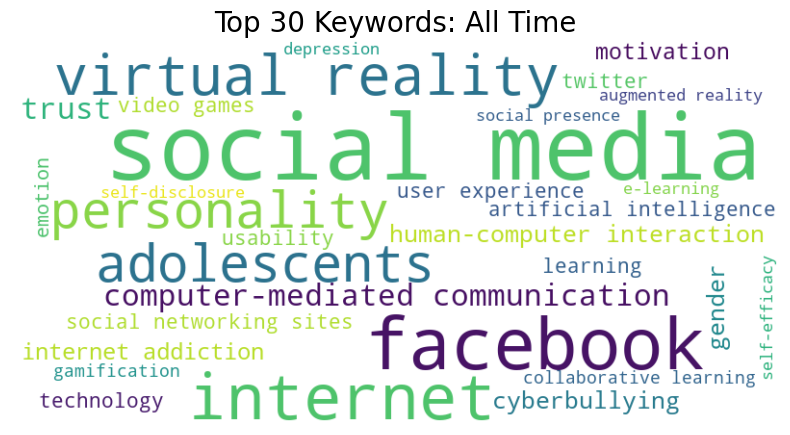

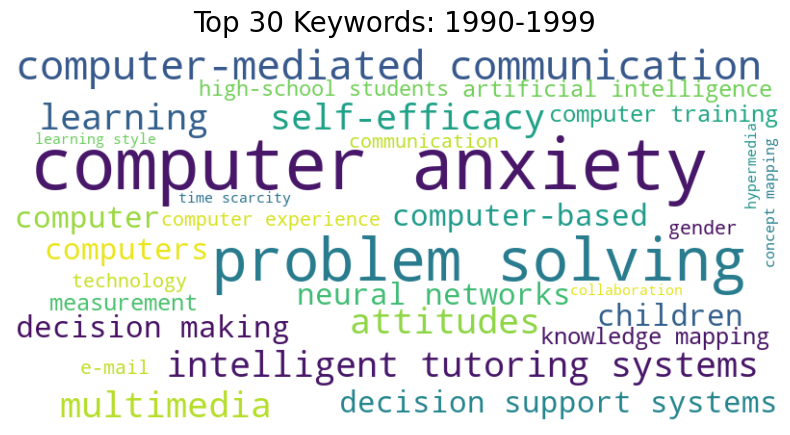

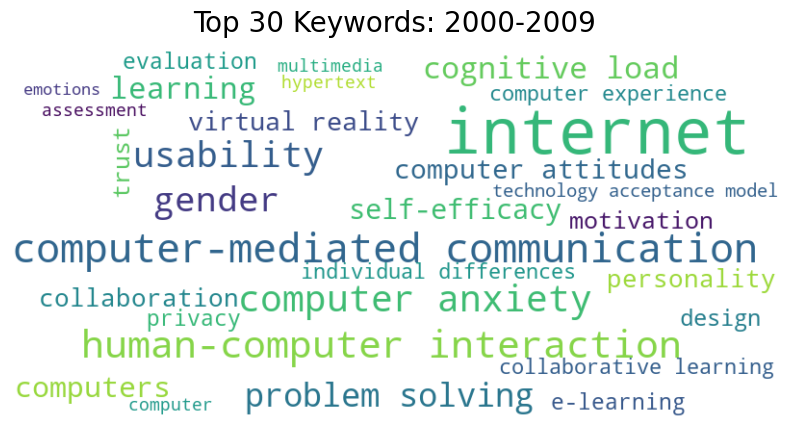

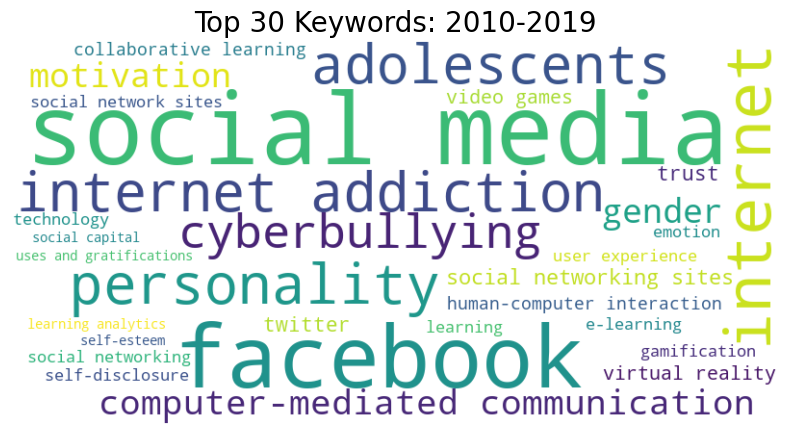

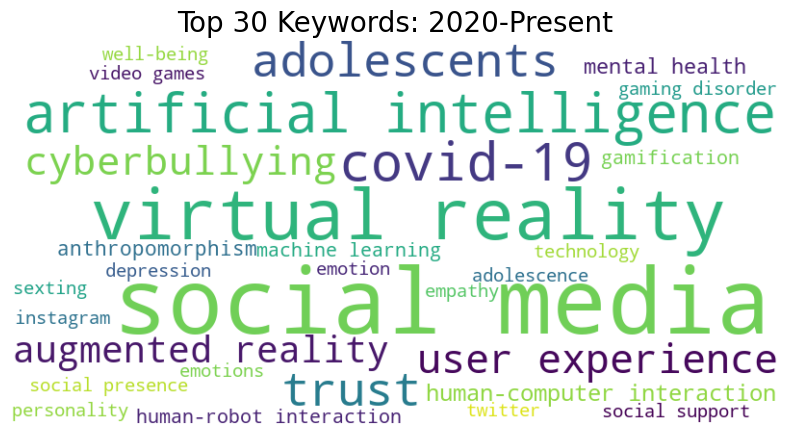

In [ ]:
#create wordcloud based on top keywords
def generate_wordcloud(data, title):
    
    wc = WordCloud(width=800, height=400, background_color='white')
    
    
    words = dict(zip(data.index, data.values))
    wc.generate_from_frequencies(words)
    
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, size=20)
    plt.axis("off")
    plt.show()

for label, data in time_periods_data:
    generate_wordcloud(data, f"Top 30 Keywords: {label}")

In [ ]:
from collections import Counter

author_counts = Counter()

selected_df['Author List'].apply(lambda authors: author_counts.update([author.strip() for author in authors]))

len(author_counts)

24177

In [61]:
#collaboration index CI and collaboration coefficient CC
collaboration_index = (len(author_counts) / selected_df.shape[0])/ selected_df.shape[0]
collaboration_coef = 1 - (selected_df.shape[0] / len(author_counts))
print(collaboration_index, collaboration_coef)

0.00021562172388556002 0.5620217562145842


In [ ]:
#co-authorship
G = nx.Graph()

for authors in selected_df['Author List']:
    G.add_nodes_from(authors)
    G.add_edges_from((authors[i], authors[j]) for i in range(len(authors)) for j in range(i + 1, len(authors)))

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print("Nodes:", list(G.nodes()))
print("Edges:", list(G.edges()))


plt.figure(figsize=(10, 8))  

pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=5000, edge_color='gray', linewidths=2, font_size=12)


plt.title("Co-Authorship Graph")
plt.show()

In [ ]:
#co-word 
from itertools import combinations

G = nx.Graph()

for keywords in selected_df['Keywords List']:
    
    for (kw1, kw2) in combinations(keywords, 2):
        if G.has_edge(kw1, kw2):
            G[kw1][kw2]['weight'] += 1
        else:
            G.add_edge(kw1, kw2, weight=1)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.15, iterations=20)  
nx.draw_networkx(G, pos, node_size=2000, node_color='lightblue', with_labels=True, font_weight='bold', edge_color='#FF6F61')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Co-word Network of Author Keywords')
plt.show()